# Task 1 "Predictive Modeling"

# Problem Statement 

Predictive Modeling

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

### Data Preprocessing:

Start by gathering and cleaning your dataset. Ensure that it contains relevant features for prediction, such as restaurant attributes (e.g., location, cuisine type, price range) and historical aggregate ratings.
Handle missing data by either imputing missing values or removing rows with missing values.



### Feature Selection and Engineering:

Analyze the dataset to determine which features are most relevant for your prediction task. Feature engineering might involve transforming or combining features to create more informative ones.



### Splitting the Dataset:

Divide your dataset into two parts: a training set and a testing set. A common split is 70-30 or 80-20, where the larger portion is used for training and the smaller one for testing.


### Model Selection:

Experiment with different regression algorithms such as linear regression, decision trees, and random forests. You can also try other algorithms like support vector regression, gradient boosting, or neural networks.


### Model Training:

Train each of the selected models using the training dataset. Ensure that you use appropriate hyperparameters for each algorithm.


### Model Evaluation:

Evaluate the performance of each model using appropriate regression metrics. Common metrics for regression tasks include:
Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.
Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
Root Mean Squared Error (RMSE): The square root of MSE, providing an interpretable unit.
R-squared (R²): Measures the proportion of the variance in the dependent variable explained by the independent variables.


### Model Comparison:

Compare the performance of different algorithms based on the evaluation metrics. Choose the one that performs the best on the testing data.



### Fine-Tuning and Cross-Validation:

If necessary, fine-tune hyperparameters and conduct cross-validation to ensure your model's generalization to unseen data.



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('Dataset.csv')



In [3]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
data.shape

(9551, 21)

### Data Cleaning 

In [56]:
data = data.fillna('NaN')

In [57]:
data.isnull().sum()

Restaurant ID           0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [58]:
data.dropna(inplace = True) ##Removing missing data

# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

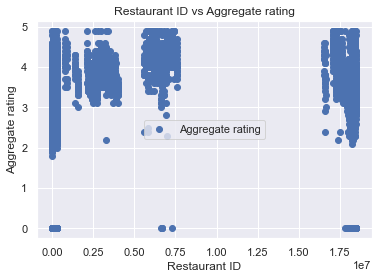

In [59]:
# Plotting the distribution of scores
data.plot(x='Restaurant ID', y='Aggregate rating', style='o')  
plt.title('Restaurant ID vs Aggregate rating')  
plt.xlabel('Restaurant ID')  
plt.ylabel('Aggregate rating')  
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 65533 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 65533 missing from current font.



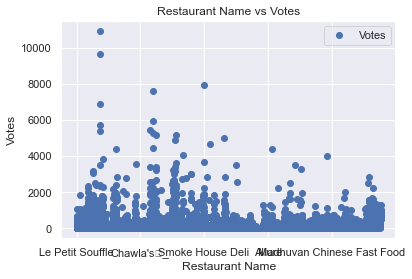

In [19]:
# Plotting the distribution of scores
data.plot(x='Restaurant Name', y='Votes', style='o')  
plt.title('Restaurant Name vs Votes')  
plt.xlabel('Restaurant Name')  
plt.ylabel('Votes')  
plt.show()

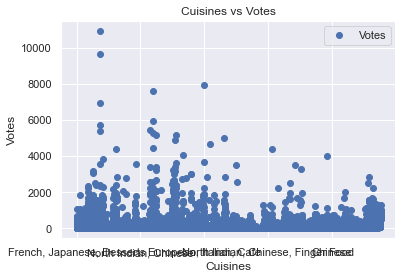

In [20]:

# Plotting the distribution of scores
data.plot(x='Cuisines', y='Votes', style='o')  
plt.title('Cuisines vs Votes')  
plt.xlabel('Cuisines')  
plt.ylabel('Votes')  
plt.show()

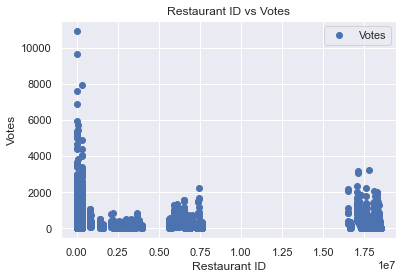

In [21]:

# Plotting the distribution of scores
data.plot(x='Restaurant ID', y='Votes', style='o')  
plt.title('Restaurant ID vs Votes')  
plt.xlabel('Restaurant ID')  
plt.ylabel('Votes')  
plt.show()

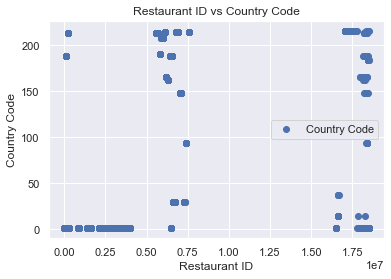

In [22]:
# Plotting the distribution of scores
data.plot(x='Restaurant ID', y='Country Code', style='o')  
plt.title('Restaurant ID vs Country Code')  
plt.xlabel('Restaurant ID')  
plt.ylabel('Country Code')  
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('Dataset.csv')

# Select features and target variable
X = data[['Restaurant ID', 'Votes']]
y = data['Aggregate rating']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model (you can replace LinearRegression with another algorithm)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.9140815963106492
Root Mean Squared Error: 1.3835033777734875
R-squared: 0.1590553859855408


# DECISION TREE

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

In [18]:
# Import the needed matplotlib functionality for scatter plot visualization.
import matplotlib.pyplot as plt
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree

<AxesSubplot:>

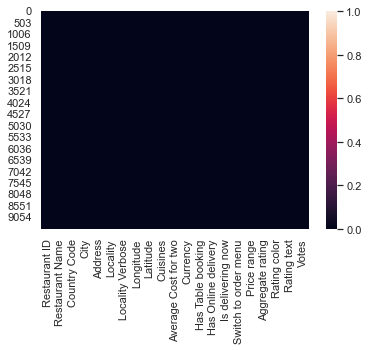

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.heatmap(data.isnull())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


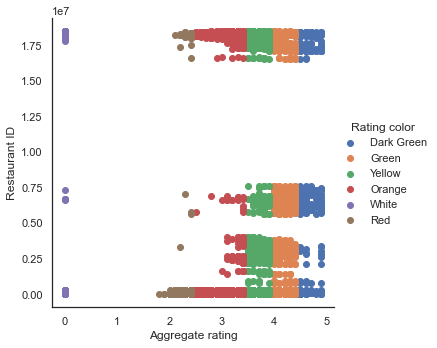

In [19]:
#Let see how the classes are separated

sns.FacetGrid(data, hue="Rating color", size=5) \
   .map(plt.scatter, "Aggregate rating", "Restaurant ID") \
   .add_legend()

In [20]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


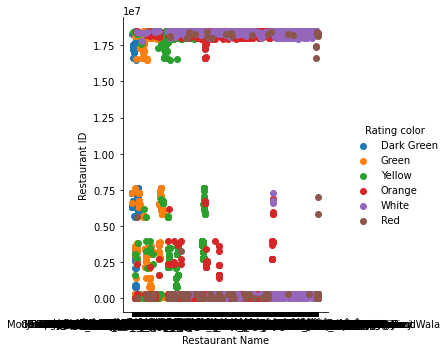

In [3]:
#Let see how the classes are separated

sns.FacetGrid(data, hue="Rating color", size=5) \
   .map(plt.scatter, "Restaurant Name", "Restaurant ID") \
   .add_legend()

In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

To Check Data is Numeric or Categorical?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#Convert relevant columns to categorical variables
data['Restaurant ID']=data['Restaurant ID'].astype('category')
data['Address']=data['Address'].astype('category')
data['Locality']=data['Locality'].astype('category')
data['Average Cost for two']=data['Average Cost for two'].astype('category')
data['Rating color']=data['Rating color'].astype('category')
data['Rating text']=data['Rating text'].astype('category')
data['Currency']=data['Currency'].astype('category')
data['Is delivering now']=data['Is delivering now'].astype('category')


Summary of the data

In [7]:
data.describe()

,Country Code,Longitude,Latitude,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,4.000000,4.900000,10934.000000


In [51]:
data.isnull().sum()

Restaurant ID           0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
data =data.drop(['Cuisines'], axis=1)

In [10]:
#levels of Y variable
data['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

Imbalanced dataset

Splitting the dataset

In [11]:
#Create dataframes for X and Y variables
x = data.drop(["City"], axis=1)
y = data[['City']]
print(x.shape)
print(y.shape)

(9551, 19)
(9551, 1)


In [12]:
##Convert x to dummy variables
x=pd.get_dummies(x)

In [13]:
x.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Price range',
       'Aggregate rating', 'Votes', 'Restaurant ID_53', 'Restaurant ID_55',
       'Restaurant ID_60', 'Restaurant ID_64',
       ...
       'Rating color_Orange', 'Rating color_Red', 'Rating color_White',
       'Rating color_Yellow', 'Rating text_Average', 'Rating text_Excellent',
       'Rating text_Good', 'Rating text_Not rated', 'Rating text_Poor',
       'Rating text_Very Good'],
      dtype='object', length=28565)

In [14]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [15]:
X_train.shape,X_test.shape

((6685, 28565), (2866, 28565))

Model1:- Criterion='gini'

In [19]:
model_gini=DecisionTreeClassifier()

In [20]:
model_gini.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:
preds_gini = model_gini.predict(X_test)

Evaluation Metrics

In [22]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[8 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 4]]


In [23]:
#Calculate accuracy
print(accuracy_score(y_test,preds_gini))

0.9717376133984648


In [24]:
print(metrics.classification_report(y_test,preds_gini))

                        precision    recall  f1-score   support

             Abu Dhabi       1.00      1.00      1.00         8
                  Agra       1.00      0.75      0.86         4
             Ahmedabad       1.00      1.00      1.00         8
                Albany       1.00      0.83      0.91         6
             Allahabad       1.00      0.75      0.86         4
              Amritsar       0.80      1.00      0.89         4
                Ankara       0.86      1.00      0.92         6
                Athens       1.00      1.00      1.00         4
              Auckland       1.00      1.00      1.00         6
               Augusta       1.00      1.00      1.00         3
            Aurangabad       0.83      1.00      0.91         5
               Bandung       0.00      0.00      0.00         1
             Bangalore       1.00      1.00      1.00         5
                Bhopal       0.78      1.00      0.88         7
          Bhubaneshwar       1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

Model1:- Criterion='entropy'

In [25]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [26]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [28]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[8 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


Evaluation Metrics

In [29]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.9696441032798325
1.0


In [30]:
print(metrics.classification_report(y_test,preds_entropy))

                        precision    recall  f1-score   support

             Abu Dhabi       1.00      1.00      1.00         8
                  Agra       0.60      0.75      0.67         4
             Ahmedabad       1.00      1.00      1.00         8
                Albany       1.00      1.00      1.00         6
             Allahabad       1.00      0.50      0.67         4
              Amritsar       0.80      1.00      0.89         4
                Ankara       1.00      1.00      1.00         6
                Athens       1.00      1.00      1.00         4
              Auckland       1.00      0.83      0.91         6
               Augusta       1.00      1.00      1.00         3
            Aurangabad       0.56      1.00      0.71         5
              Balingup       0.00      0.00      0.00         0
               Bandung       0.00      0.00      0.00         1
             Bangalore       1.00      1.00      1.00         5
            Beechworth       0.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [31]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_entropy)

confusion matrix = 
 [[8 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


# TASK 2   "Customer Preference Analysis"

## Problem Statement: 

Analyze the relationship between the type of cuisine and the restaurant's rating.

Identify the most popular cuisines among customers based on the number of votes.

Determine if there are any specific cuisines that tend to receive higher ratings.

In [2]:
#1.Loads the dataset.
#2.Prints the first few rows and summary statistics.
#3.Calculates the correlation matrix between numerical columns.
#4.Identifies the most popular cuisines based on the total number of votes.
#5.Determines the average ratings for each cuisine.
#6.Visualizes the top 10 popular cuisines and top 10 average ratings by cuisine.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'dataset.csv' with the actual file path or URL to your dataset
data = pd.read_csv('Dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Exploratory Data Analysis (EDA)
# Check the summary statistics of the dataset
print(data.describe())

# Correlation Analysis
correlation_matrix = data.corr()
print(correlation_matrix)




   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
# Popular Cuisines Analysis
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("Most Popular Cuisines:")
print(popular_cuisines)



Most Popular Cuisines:
Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64


In [8]:
# Rating Analysis by Cuisine
average_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Ratings by Cuisine:")
print(average_rating_by_cuisine)



Average Ratings by Cuisine:
Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


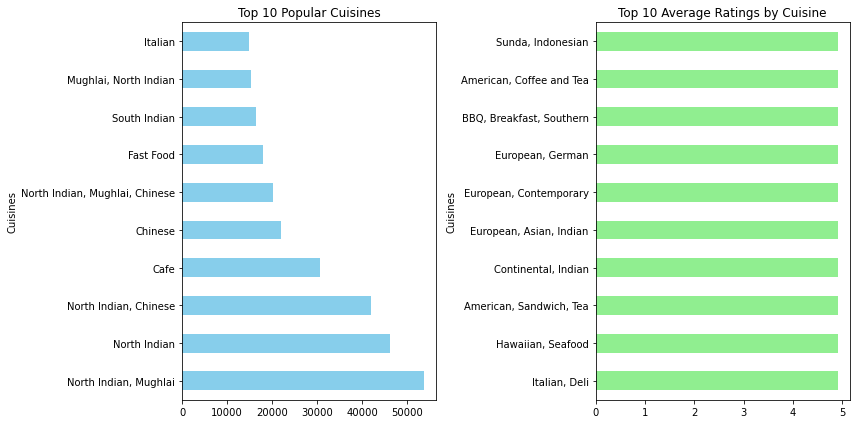

In [9]:
# Visualization
plt.figure(figsize=(12, 6))

# Bar plot for popular cuisines
plt.subplot(1, 2, 1)
popular_cuisines.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Popular Cuisines')

# Bar plot for average ratings by cuisine
plt.subplot(1, 2, 2)
average_rating_by_cuisine.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Average Ratings by Cuisine')

plt.tight_layout()
plt.show()

# TASK 3  "DATA VISUALIZATION"

# Problem Statement: 

Create visualizations to represent the distribution of ratings using different charts (histogram, bar
plot, etc.).

Compare the average ratings of different cuisines or cities using appropriate visualizations.

Visualize the relationship between various features and the target variable to gain insights.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster


In [2]:
import numpy as np #library for calculations on Multidimensional Arrays
import pandas as pd #library for data manipulation
import missingno as msno #library for visualize the distribution of null values
import plotly #library for graph
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
from pylab import rcParams #libary for customizing the properties and default styles of Matplotlib
import seaborn as sns #library for statistical data visualization
import matplotlib.pyplot as plt #library that provides a MATLAB-like way of plotting
sns.set(style="darkgrid")
import statistics as stat #library for statistical data visualization

In [5]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
data.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [15]:
data.shape

(9551, 21)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [39]:
data.dtypes

Restaurant ID           category
Restaurant Name           object
Country Code               int64
City                      object
Address                 category
Locality                category
Locality Verbose          object
Longitude                float64
Latitude                 float64
Average Cost for two    category
Currency                category
Has Table booking         object
Has Online delivery       object
Is delivering now       category
Switch to order menu      object
Price range                int64
Aggregate rating         float64
Rating color            category
Rating text             category
Votes                      int64
dtype: object

Analyzing the categorical variables:

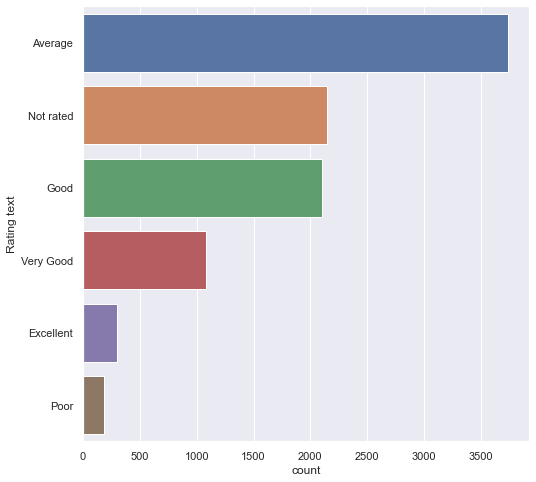

In [40]:
plt.figure(figsize=(8,8))
sns.countplot(y='Rating text', data=data, order=data["Rating text"].value_counts().index)
plt.show()


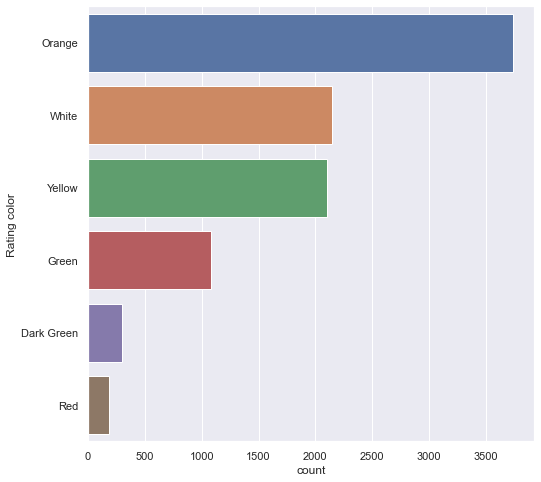

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(y='Rating color', data=data, order=data["Rating color"].value_counts().index)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 65533 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 65533 missing from current font.



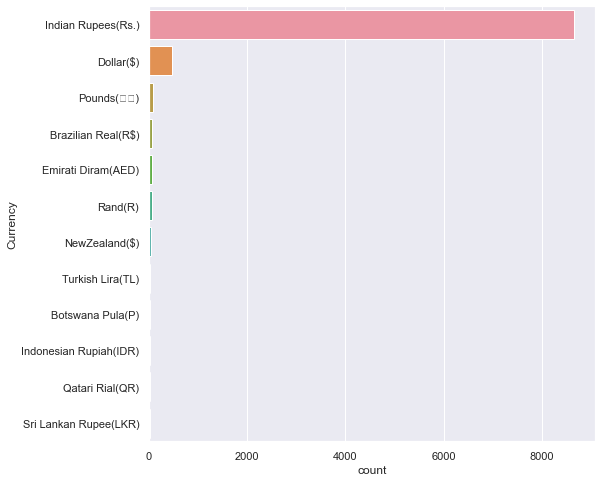

In [42]:
plt.figure(figsize=(8,8))
sns.countplot(y='Currency', data=data, order=data["Currency"].value_counts().index)
plt.show()


In [43]:
data['Aggregate rating'].value_counts(normalize = True)

0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8    0.000105
Name: Aggregate rating, dtype: float64

Grouping Based On Outcome

In [8]:
#Group numerical variables by mean
data.groupby("Aggregate rating").mean()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes
Aggregate rating,,,,,,,
0.0,1.557339e+07,1.467412,66.414044,24.721911,340.337523,1.235102,0.870112
1.8,1.683000e+03,1.000000,77.370165,28.633970,1000.000000,3.000000,322.000000
1.9,3.583500e+03,1.000000,77.180158,28.594653,375.000000,1.500000,106.000000
2.0,4.688600e+04,1.000000,77.271816,28.562687,892.857143,2.000000,129.714286
2.1,1.361759e+06,1.000000,77.212653,28.570237,633.333333,1.733333,76.400000
2.2,3.583381e+06,8.962963,71.294190,28.513846,599.074074,1.777778,94.962963
2.3,4.922090e+06,4.127660,77.664529,26.573448,565.957447,1.787234,69.808511
2.4,2.720506e+06,8.252874,75.999615,27.850644,670.919540,1.885057,97.011494
2.5,3.316584e+06,2.727273,77.259436,28.376051,622.272727,1.827273,79.672727


Histogram on the Data

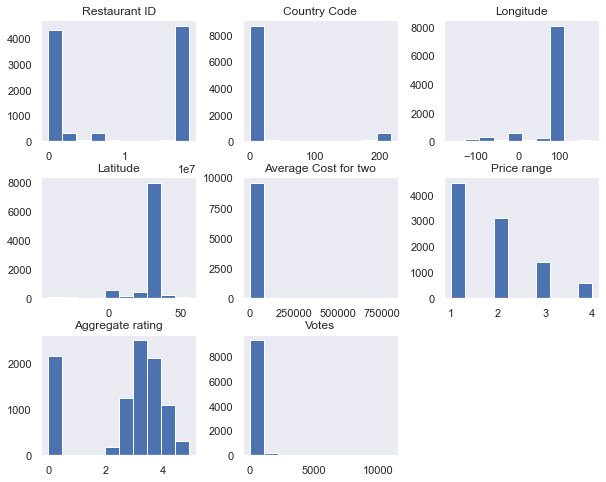

In [17]:
data.hist(figsize=(10,8), grid=False)
plt.show()

BOXPLOT on the data (Outlier Detection)

Restaurant ID              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Country Code            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Longitude               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Latitude                   AxesSubplot(0.125,0.391471;0.227941x0.222059)
Average Cost for two    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Price range             AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Aggregate rating              AxesSubplot(0.125,0.125;0.227941x0.222059)
Votes                      AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

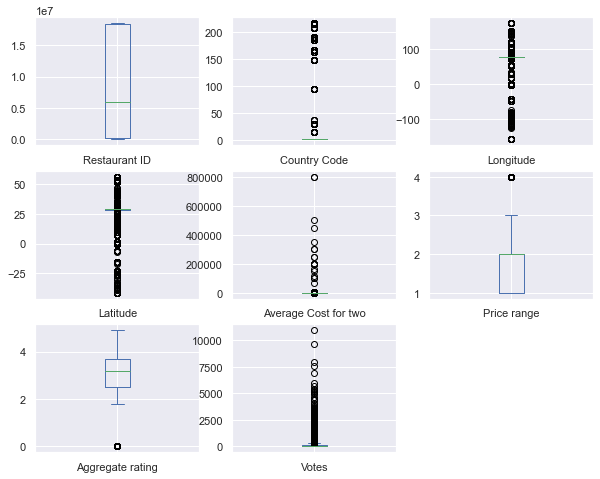

In [18]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

Correlation Matrix of Variables using HeatMap

<AxesSubplot:>

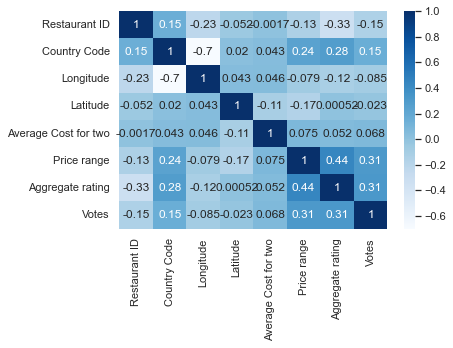

In [19]:
corr = data[data.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Restaurant ID'),
  Text(0, 1.5, 'Country Code'),
  Text(0, 2.5, 'Longitude'),
  Text(0, 3.5, 'Latitude'),
  Text(0, 4.5, 'Average Cost for two'),
  Text(0, 5.5, 'Price range'),
  Text(0, 6.5, 'Aggregate rating'),
  Text(0, 7.5, 'Votes')])

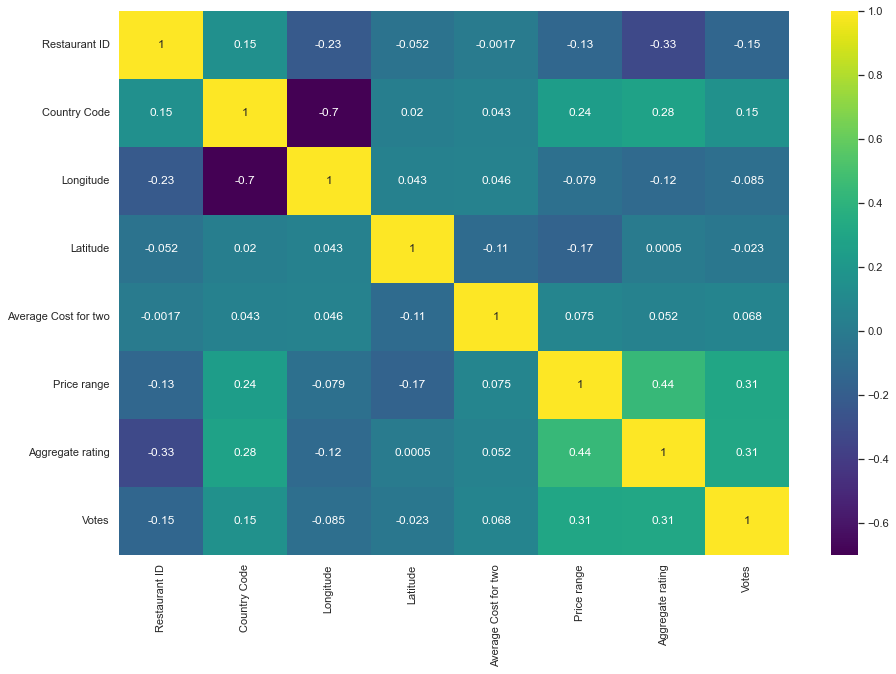

In [20]:
#Correlation Analysis
plt.figure(figsize=(15,10))

sns.heatmap(np.round(data.corr(),4), annot=True, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 65533 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 65533 missing from current font.



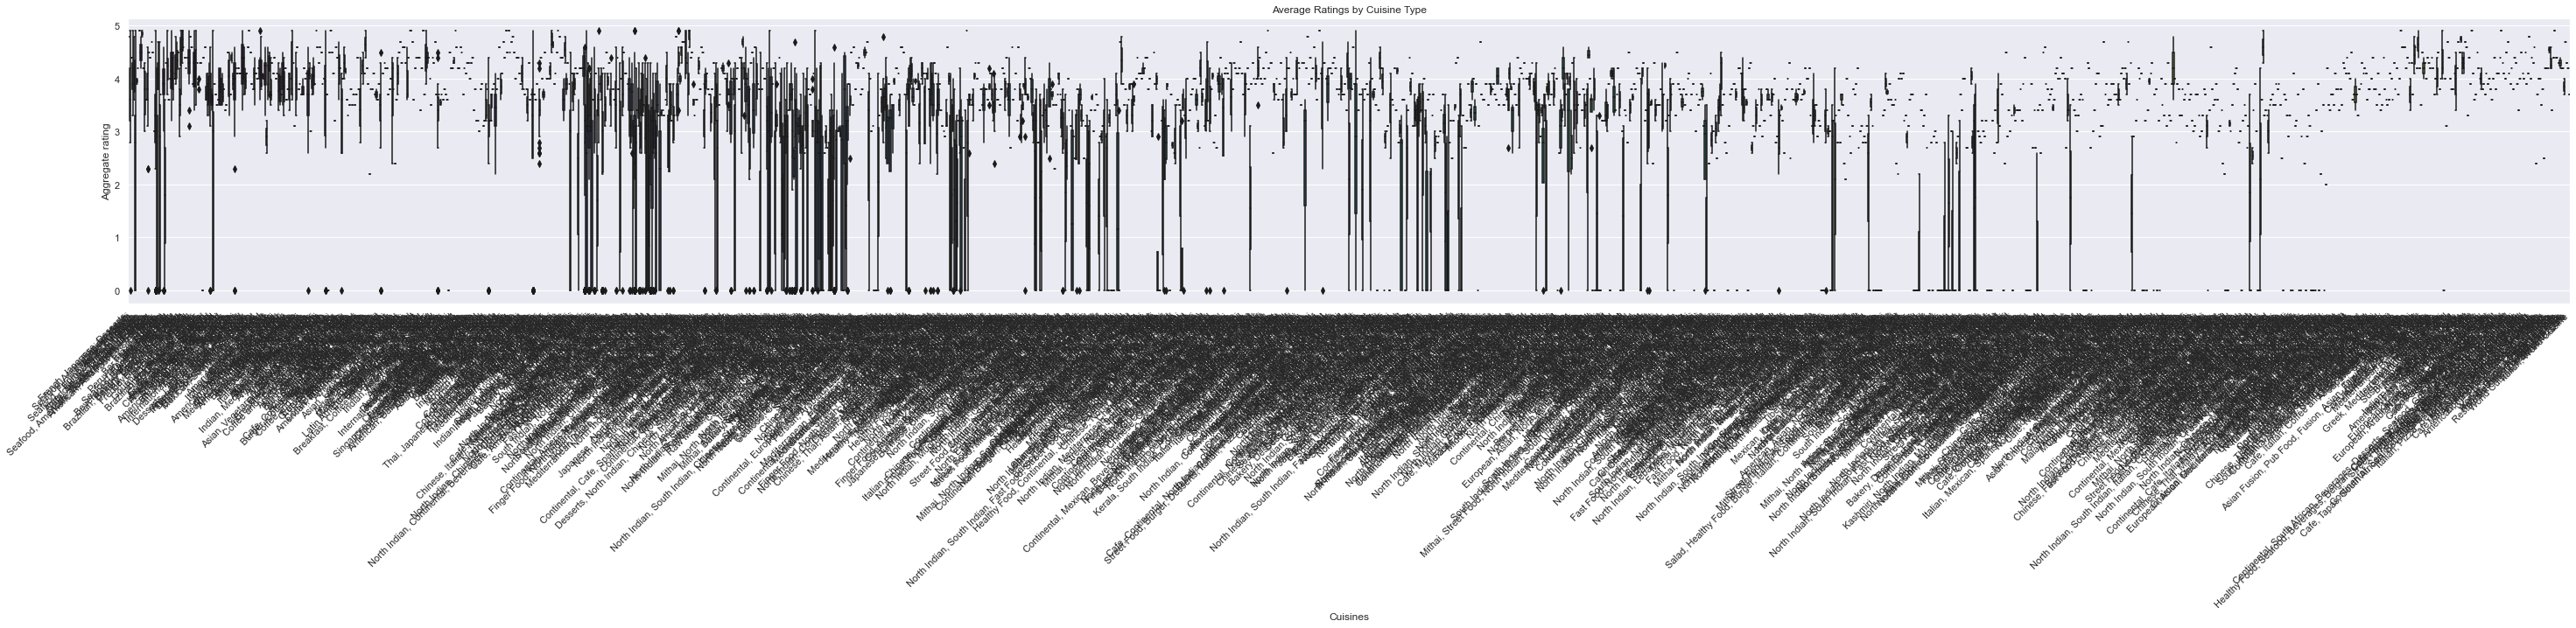

In [28]:

# Comparing Average Ratings of Different Cuisines
plt.figure(figsize=(50,6))


# Boxplot of rating colour for each cuisine
sns.boxplot(x='Cuisines', y='Aggregate rating', data=data, palette='viridis')
plt.title('Average Ratings by Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 65533 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 65533 missing from current font.



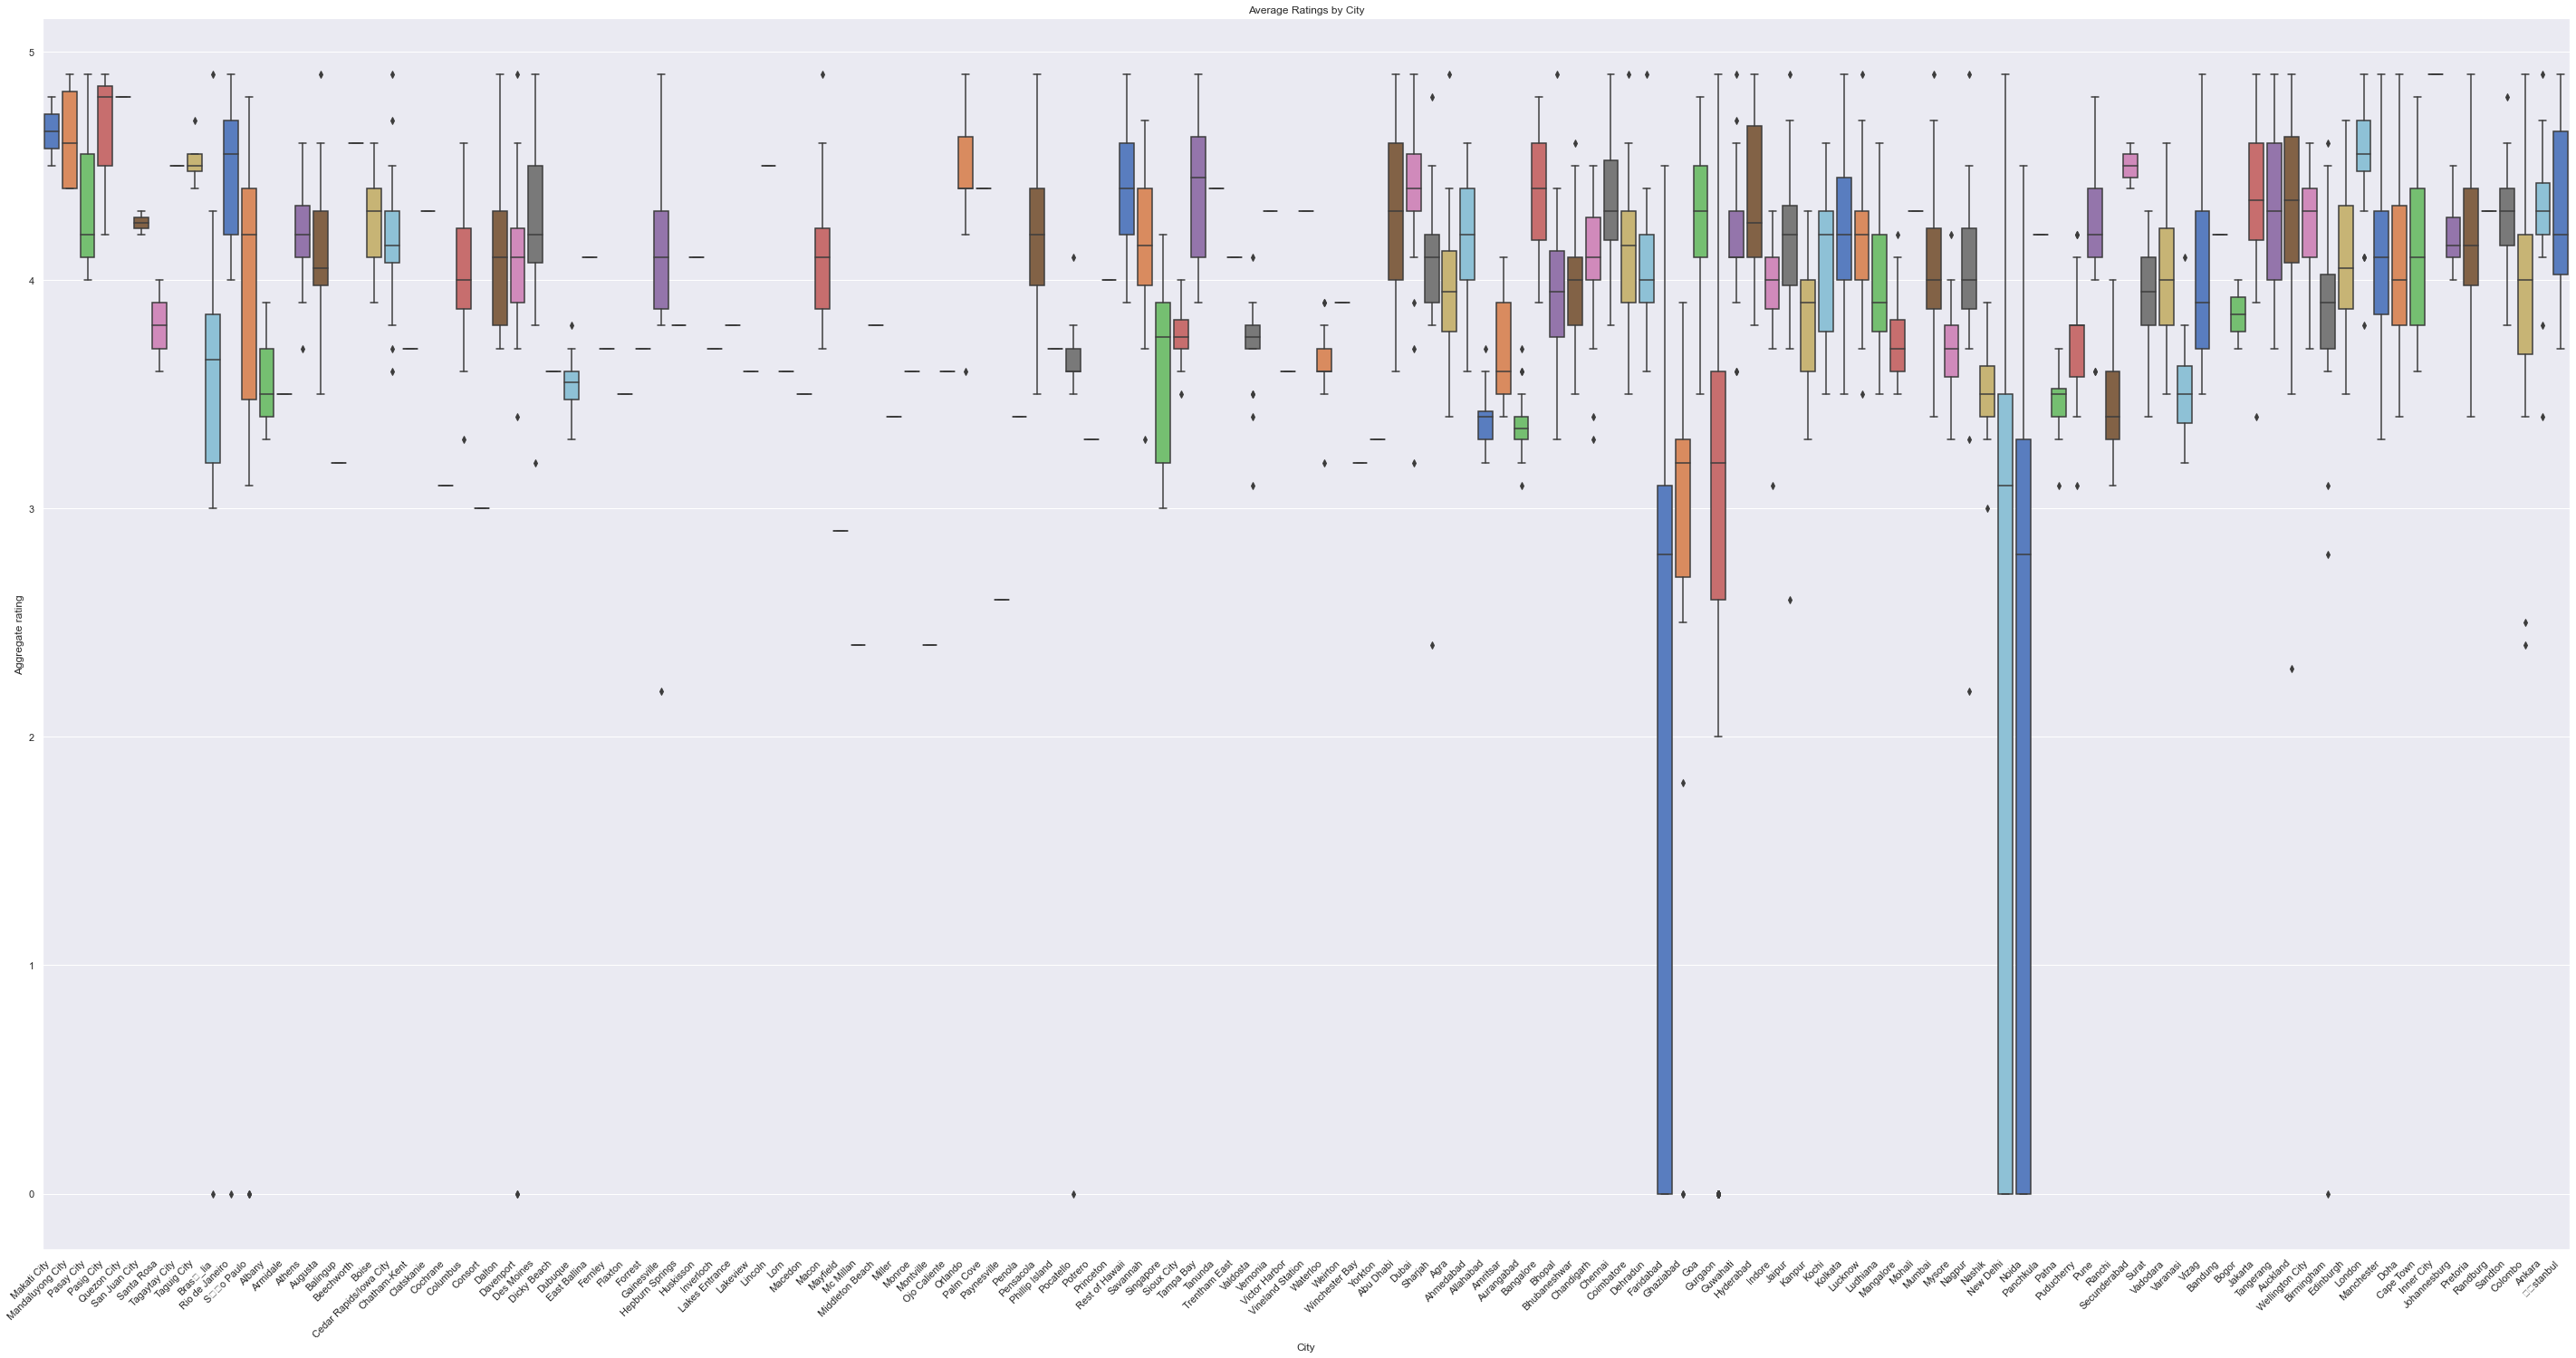

In [29]:
# Comparing Average Ratings of Different Cities
plt.figure(figsize=(50, 25))

# Boxplot of rating colour for each city
sns.boxplot(x='City', y='Aggregate rating', data=data, palette='muted')
plt.title('Average Ratings by City')
plt.xticks(rotation=45, ha='right')
plt.show()



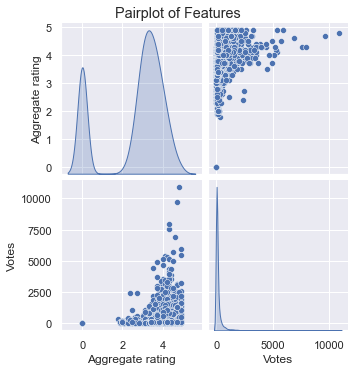

In [30]:
# Relationship between Features and Target Variable (e.g., Number of Votes)
# Pairplot for selected features
selected_features = ['Aggregate rating', 'Votes', 'Currency', 'Rating text']
sns.pairplot(data[selected_features], kind='scatter', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

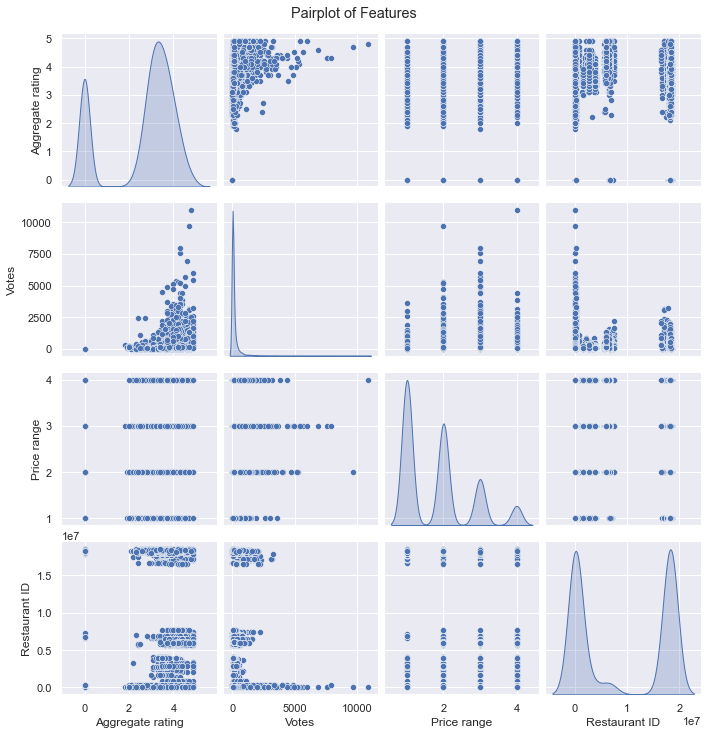

In [9]:

selected_features = ['Aggregate rating', 'Votes', 'Price range', 'Restaurant ID']
sns.pairplot(data[selected_features], kind='scatter', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

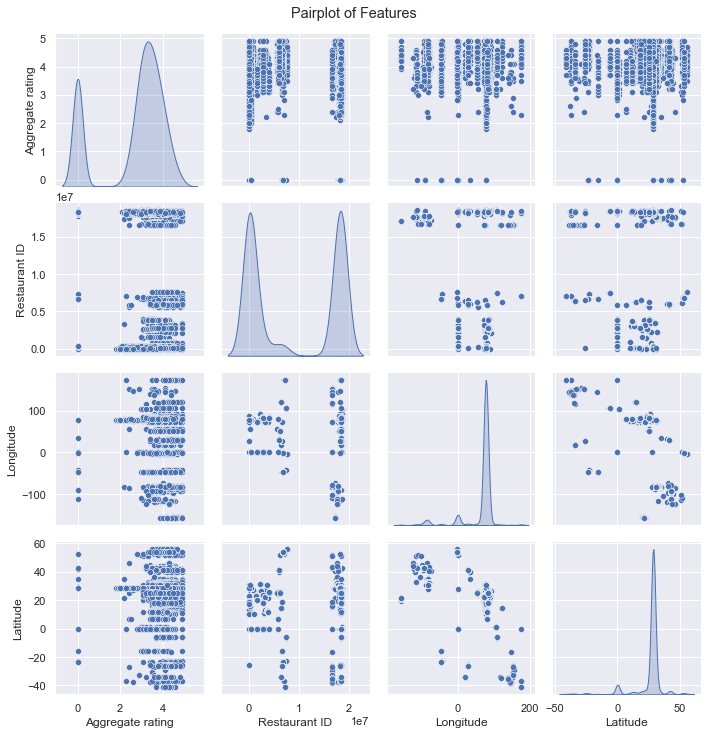

In [10]:

selected_features = ['Aggregate rating', 'Restaurant ID','Longitude','Latitude']
sns.pairplot(data[selected_features], kind='scatter', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()